In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [287]:
data = pd.read_csv("../dados-ru/Tabela_1min.csv",
                   parse_dates=['Datetime']
                   # index_col='data' # Quando o cabeçalho for corrigido
                  )
data = data.rename(columns={'Datetime':'data',
                            'Num_pessoas':'num_pessoas',
                            'Refeição':'refeicao',
                            'Carne':'proteina'
                           })

data = data.set_index("data")
data.head()

,num_pessoas,refeicao,proteina
data,,,
2019-03-01 06:46:00,5,Café da Manhã,NaN
2019-03-01 06:47:00,10,Café da Manhã,NaN
2019-03-01 06:49:00,4,Café da Manhã,NaN
2019-03-01 06:50:00,5,Café da Manhã,NaN
2019-03-01 06:51:00,3,Café da Manhã,NaN


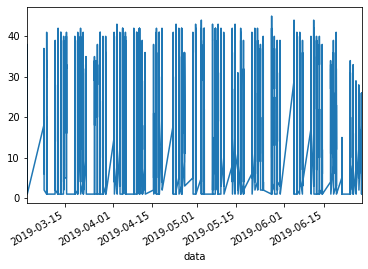

In [400]:
data[data.refeicao == 'Almoço'].num_pessoas.plot()

In [421]:
data['2019-03-01':'2019-03-15']

,num_pessoas,refeicao,proteina
data,,,
2019-03-01 06:46:00,5,Café da Manhã,NaN
2019-03-01 06:47:00,10,Café da Manhã,NaN
2019-03-01 06:49:00,4,Café da Manhã,NaN
2019-03-01 06:50:00,5,Café da Manhã,NaN
2019-03-01 06:51:00,3,Café da Manhã,NaN
...,...,...,...
2019-03-15 19:26:00,1,Jantar,NaN
2019-03-15 19:27:00,6,Jantar,NaN
2019-03-15 19:28:00,4,Jantar,NaN


In [292]:
data_dia = data['2019-03-01']
data_dia[data_dia.refeicao == 'Almoço']

,num_pessoas,refeicao,proteina
data,,,
2019-03-01 11:00:00,6,Almoço,Frango assado
2019-03-01 11:01:00,31,Almoço,Frango assado
2019-03-01 11:02:00,32,Almoço,Frango assado
2019-03-01 11:03:00,27,Almoço,Frango assado
2019-03-01 11:04:00,20,Almoço,Frango assado
...,...,...,...
2019-03-01 13:27:00,4,Almoço,Frango assado
2019-03-01 13:28:00,3,Almoço,Frango assado
2019-03-01 13:30:00,2,Almoço,Frango assado


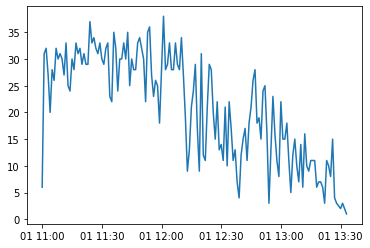

In [413]:
df_dia = data['2019-03-01']
df_dia = df_dia[df_dia.refeicao == 'Almoço']
plt.plot(df_dia.num_pessoas)

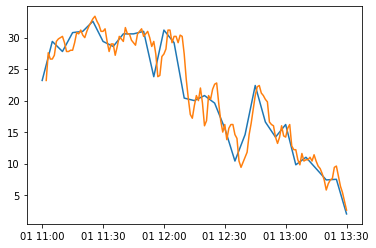

In [416]:
df_dia_5 = df_dia.resample("5T").mean()
#plt.plot(df_dia.num_pessoas)
plt.plot(df_dia_5)
df_dia_r5 = df_dia.rolling(5, center=True).mean()
plt.plot(df_dia_r5)

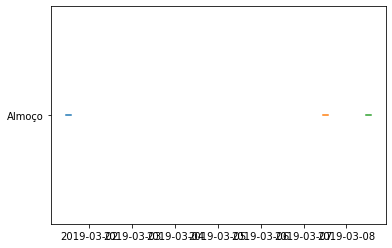

In [420]:
df_almoco = data[data.refeicao == 'Almoço']
dias = np.unique([x.date() for x in df_almoco.index])
dias = dias[0:3]
for dia in dias:
    idx = [x.date() == dia for x in df_almoco.index]
    df_dia = df_almoco[idx]
    plt.plot(df_dia.refeicao)

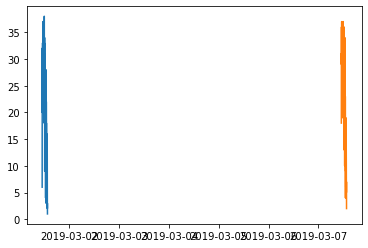

In [402]:
dias = dias[0:2]
for dia in dias:
    idx = [x.date() == dia for x in data.index]
    df_dia = data[idx]
    plt.plot(df_dia[df_dia.refeicao == 'Almoço'].num_pessoas)